In [13]:
from MapfEnv import *
from MapGenerator import *
from MapfObserver import *
import worker
import worker1

num_agents = 10 #at least 4
world_size = 30  #//2 * 2 + 3

generator = MapGenerator(env_size=world_size, wall_components=2, obstacle_density=0.5)
observer= MapfObserver(view_distance=2, communication_distance=2)

env = MapfENV(map_generator=generator, observer=observer, num_agents=num_agents, render_mode=None ,render_fps=300)

In [14]:
policy_network = worker.reinforce(env=env, num_episodes=300, gamma=0.99)

  0%|          | 0/300 [00:20<?, ?it/s]


KeyboardInterrupt: 

In [3]:
env.close()

In [15]:
policy_network = worker.reinforce(env=env, num_episodes=300, gamma=0.99, policy_network=policy_network)

  2%|▏         | 6/300 [01:46<1:22:16, 16.79s/it]

In [2]:
%%time
episodes = 100
for episode in range(episodes):
    observations = env.reset()
    active_agents_id = observations.keys()
    dones = {agent_id: False for agent_id in active_agents_id}
    done = False
    while not done:
        joint_action = {agent_id: {'movement': None, 'ask_communication': None} for agent_id in active_agents_id}
        
        for agent_id in active_agents_id:
            if dones[agent_id]:
                if random.uniform(0,1) > 0.001:
                    joint_action[agent_id]['movement'] = env.get_AStar_next_action(agent_id)
                else:
                    joint_action[agent_id]['movement'] = random.choice(list(MovementAction)).value
            else:
                if random.uniform(0,1) > 0.5:
                    joint_action[agent_id]['movement'] = env.get_AStar_next_action(agent_id)
                else:
                    joint_action[agent_id]['movement'] = random.choice(list(MovementAction)).value
        
            joint_action[agent_id]['ask_communication'] = random.choice(list(AskingCommunicationAction)).value
        
        observations, rewards, dones, info = env.step(joint_action)
        #print(rewards)
        done = False not in dones.values()
env.close()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/udd/tlemarre/.local/lib/python3.11/site-packages/IPython/core/magics/execution.py", line 1319, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 24, in <module>
  File "/udd/tlemarre/Documents/DEV/GIT/Imperfect_info_MAPF/MapfEnv.py", line 101, in step
    self._render_frame(observations)
  File "/udd/tlemarre/Documents/DEV/GIT/Imperfect_info_MAPF/MapfEnv.py", line 400, in _render_frame
    agent1_walls_obs_map = agent_walls(agent, observations[agent.get_id()])
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/udd/tlemarre/Documents/DEV/GIT/Imperfect_info_MAPF/MapfEnv.py", line -1, in agent_walls
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/udd/tlemarre/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
      

[1, 2, 3]


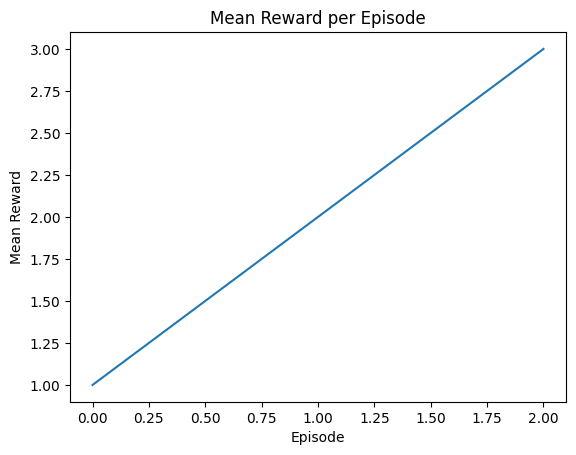

In [8]:
import statistics

import matplotlib.pyplot as plt

rewards_dict = {
    "agent1": [1, 2, 3],
    "agent2": [1, 2, 3],
    "agent3": [1, 2, 3]
}

num_episodes = len(rewards_dict['agent1'])  # Assumes all agents have the same number of episodes

mean_episode_rewards = []

for i in range(num_episodes):
    episode_rewards = [rewards_dict[agent_id][i] for agent_id in rewards_dict]
    mean_episode_reward = statistics.mean(episode_rewards)
    mean_episode_rewards.append(mean_episode_reward)

print(mean_episode_rewards)

# Plot the cumulative rewards so far
plt.plot(mean_episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Mean Reward')
plt.title('Mean Reward per Episode')
plt.show()